本次作业分为三个部分， 我全弄到了一个笔记本里面

# Initialization


欢迎来到“改进深层神经网络”的第一个作业。

训练神经网络需要指定权重的初始值。精心选择的初始化方法将有助于学习。

如果您完成了此专业化的上一个课程，您可能会按照我们的说明进行重量初始化，到目前为止，它已经成功了。但是如何为新的神经网络选择初始化呢？在本笔记本中，您将看到不同的初始化如何导致不同的结果。

精心选择的初始化可以：

-加速梯度下降法的收敛

-增加梯度下降收敛到较低训练（和泛化）误差的几率

要开始，请运行以下单元格以加载要尝试分类的包和平面数据集。

本作业为“改进神经网络的第一个作业”  
由于训练神经网络需要对权重进行初始化， 而合适的初始化方法则有助于我们的训练    

在本次作业中， 我们将看到不同的初始化方法是如何导致训练出不同结果 

对于优秀的初始化方法的好处： 
- 加速梯度下降算法的收敛 
- 增加梯度下降收敛到较低训练误差或泛化误差的概率   
下面， 加载数据

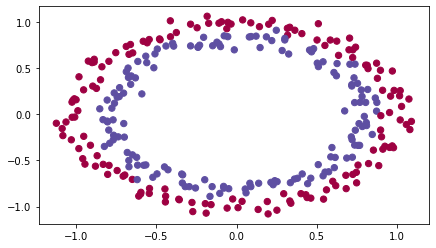

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import *

plt.rcParams['figure.figsize'] = (7.0 , 4.0) # 设置默认 的作图大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X , train_Y , test_X , test_Y = load_dataset() # 加载数据集， 包含红色/蓝色圆点

In [2]:
train_X.shape

(2, 300)

我们需要一个分类器来区分这两种点 

## 1 - Neural Network model 


我们将使用三层神经网络(包中已实现)， 下面是我们将要尝试的初始化方法：  
- *Zeros initialization*  -- 初始化为0
- *Random initialization*  -- 初始化为随机数
- *He initialization* -- 抑制梯度异常初始化 ， 可回顾梯度消失和梯度爆炸的视频    
先来看一下模型  

In [3]:
 def model( X , Y , learning_rate=0.01 , num_iterations=15000 , print_cost = True , initialization = 'he' ): 
    
    """
    目标： 实现一个三层的神经网络模型 ： LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    
    参数： 
    X -- 输入数据 ， 维度为 (2,数据量)
    Y -- 正确的标签向量  这里是0/1 维度为: (1,数据量)
    learning_rate -- 梯度下降的学习率
    num_iterations -- 迭代次数
    print_cost -- 是否输出代价(每1000次迭代)
    initialization -- 标志-> 使用哪一种初始化方法 ，三种可能的结果->（'zeros' , 'random' or 'he'）
    
    返回值： 
    parameters -- 训练得到的参数
    """
    
    grads = {}
    costs = [] # 保存代价
    m = X.shape[1]
    layers_dims = [ X.shape[0] , 10 , 5 , 1 ]
    
    # 不同的初始化方法  这里方法还未实现 ， 下面我们会一一进行实现
    if initialization == 'zeros': 
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random': 
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he': 
        parameters = initialize_parameters_he(layers_dims)
    
    
    for i in range(0,num_iterations): 
        
        # 前向传播
        a3 , cache = forward_propagation(X , parameters)
        
        # 计算代价
        cost = compute_loss(a3 , Y)
        
        # 计算梯度
        grads = backward_propagation(X , Y , cache)
        
        # 更新参数
        parameters = update_parameters(parameters , grads , learning_rate)
        
        if print_cost and i % 1000 ==0 : 
            print( 'Cost after iteration {}: {}'.format(i,cost) )
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations(per hundreds)')
    plt.title('Learning raye - ' + str(learning_rate))
    
    plt.show
    
    return parameters


## 2 - Zero initialization

模型中会有两中类型的参数需要初始化 ：  
- 权重矩阵   $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- 偏置矩阵 $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**练习：** 我们要实现零初始化函数， 我们看一下会产生怎样的结果 


In [4]:
def initialize_parameters_zeros( layers_dims ): 
    """
    参数：  
    layers_dims -- 一个列表 ，表示每层节点的数量
    
    返回值： 
    parameters -- 字典  包含初始化所得的参数 包含所有的W和b： 
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L): 
        
        parameters['W' + str(l)] = np.zeros( (layers_dims[l] , layers_dims[l-1] ) )
        parameters['b' + str(l)] = np.zeros( (layers_dims[l] , 1) )
        
    return parameters
    

In [5]:
parameters = initialize_parameters_zeros([3,2,1])

print("W1 = " + str(parameters['W1']))
print("b1 = " + str(parameters['b1']))
print("W2 = " + str(parameters['W2']))
print("b2 = " + str(parameters['b2']))


W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


**正确输出**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

使用零初始化训练模型

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453
On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


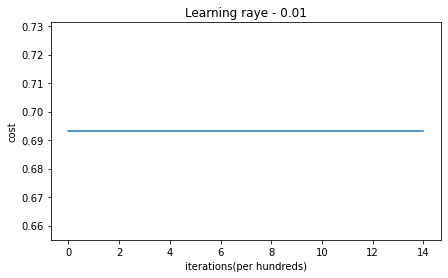

In [10]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

我们看一下 在测试集上的表现，以及其决策边界

In [11]:
print("predictions_train : " + str(predictions_train))

print("predictions_test : " + str(predictions_test))

predictions_train : [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test : [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


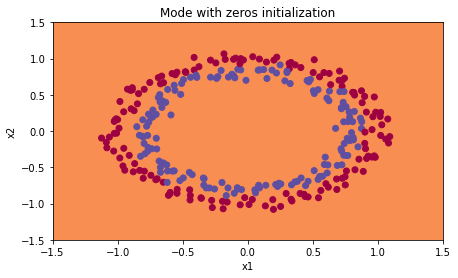

In [12]:
plt.title( "Mode with zeros initialization" )
axes = plt.gca()
axes.set_xlim( [-1.5 , 1.5] )
axes.set_ylim( [-1.5 , 1.5] )
plot_decision_boundary(lambda x : predict_dec(parameters , x.T) , train_X , train_Y)


性能非常差  
它无法打破对称性， 这使得每个神经元都学习相同的内容

**注：** W的随机初始化可以破坏对称性，而b则可以随意初始化，对对称性无影响

## 3 - Random initialization

为了打破对称性，我们使用随机初始化，这样，每个神经元都将学到不同的内容，但是，如果我们设置比较大的参数，又会导致怎样的结果。  
**练习：** 实现随机初始化函数，初始化W为较大的随机值，b为0  

In [13]:
def initialize_parameters_random( layers_dims ): 
    
    """
    参数：  
    layers_dims -- 一个列表 ，表示每层节点的数量
    
    返回值： 
    parameters -- 字典  包含初始化所得的参数 包含所有的W和b： 
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    
    
    np.random.seed(3) # 指定随机数种子，确保我们的结果相同
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):  
        parameters['W' + str(l)] = np.random.randn( layers_dims[l] , layers_dims[l-1]  ) * 10
        parameters['b' + str(l)] = np.zeros( (layers_dims[l] , 1) )
        
    return parameters
    

In [14]:

parameters = initialize_parameters_random( [3,2,1] )
print("W1 = " + str(parameters['W1']))
print("b1 = " + str(parameters['b1']))
print("W2 = " + str(parameters['W2']))
print("b2 = " + str(parameters['b2']))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


**正确输出**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.82741481 -6.27000677]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

使用随机初始化训练模型

/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250884962121392
Cost after iteration 2000: 0.5981371467489438
Cost after iteration 3000: 0.5638539771863162
Cost after iteration 4000: 0.5501704762630747
Cost after iteration 5000: 0.5444592806792145
Cost after iteration 6000: 0.5374509252365552
Cost after iteration 7000: 0.4760640415643904
Cost after iteration 8000: 0.3978146724300182
Cost after iteration 9000: 0.3934785833165248
Cost after iteration 10000: 0.3920322287285902
Cost after iteration 11000: 0.38924754816043866
Cost after iteration 12000: 0.38615976417756703
Cost after iteration 13000: 0.38498687252939306
Cost after iteration 14000: 0.38278602219555746
train set: 
Accuracy: 0.83
test set: 
Accuracy: 0.86


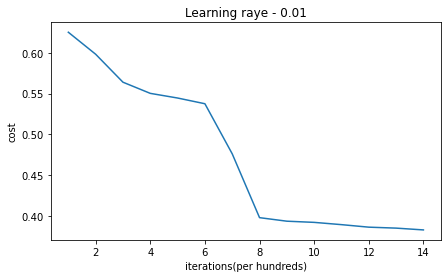

In [15]:

parameters = model( train_X , train_Y , initialization='random' )
print("train set: ")
prediction_train = predict(train_X , train_Y , parameters)

print('test set: ')
prediction_test = predict(test_X , test_Y , parameters)

测试一下

In [16]:
print("predictions_train : " + str(prediction_train))

print("predictions_test : " + str(prediction_test))

predictions_train : [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
predictions_test : [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


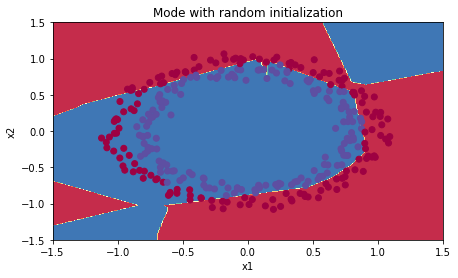

In [17]:

plt.title( "Mode with random initialization" )
axes = plt.gca()
axes.set_xlim( [-1.5 , 1.5] )
axes.set_ylim( [-1.5 , 1.5] )
plot_decision_boundary(lambda x : predict_dec(parameters , x.T) , train_X , train_Y)


可以看到，开始的时候代价很大， 因为我们初始化为较大的的随机数，对于某些节点，最后的结果会很接近0，这将导致代价无限大，  
即：   
- 初始化不会导致类似梯度消失/梯度爆炸的问题，但会减慢优化速度  
- 当训练时间变长，也会得到较好的结果。因为只是减慢了速度  

结论：  
- 初始化为较大的随机值效果不会太好  

下面 ， 探索一种新的初始化方法

## 4 - He initialization


最后，我们试试  "He Initialization" ; 关于该方法的来历，感兴趣的可以具体去了解一下  

**练习：** 实现"He Initialization" 初始化方法， 公式为 $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$

In [18]:
def initialize_parameters_he( layers_dims ): 
    
    """
    参数：  
    layers_dims -- 一个列表 ，表示每层节点的数量
    
    返回值： 
    parameters -- 字典  包含初始化所得的参数 包含所有的W和b： 
            W1 - 权重矩阵，维度为（layers_dims[1], layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[1],1）
            ···
            WL - 权重矩阵，维度为（layers_dims[L], layers_dims[L -1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L): 
        
        parameters['W' + str(l)] = np.random.randn( layers_dims[l] , layers_dims[l-1]  ) * np.sqrt( 2 / layers_dims[l-1] )
        parameters['b' + str(l)] = np.zeros( (layers_dims[l] , 1) )
        
    return parameters
    

In [19]:
parameters = initialize_parameters_he( [2,4,1] )
print("W1 = " + str(parameters['W1']))
print("b1 = " + str(parameters['b1']))
print("W2 = " + str(parameters['W2']))
print("b2 = " + str(parameters['b2']))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


**正确输出**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

运行模型

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.2369621533032257
Cost after iteration 9000: 0.18597287209206845
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024273
Cost after iteration 14000: 0.07357895962677366
train set: 
Accuracy: 0.9933333333333333
test set: 
Accuracy: 0.96


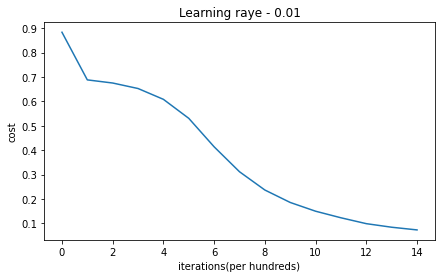

In [20]:

parameters = model( train_X , train_Y , initialization='he' )
print("train set: ")
prediction_train = predict(train_X , train_Y , parameters)

print('test set: ')
prediction_test = predict(test_X , test_Y , parameters)

In [21]:
print("predictions_train : " + str(prediction_train))

print("predictions_test : " + str(prediction_test))

predictions_train : [[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
predictions_test : [[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


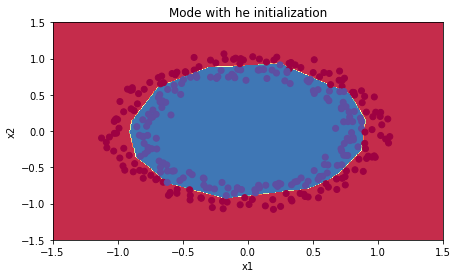

In [22]:

plt.title( "Mode with he initialization" )
axes = plt.gca()
axes.set_xlim( [-1.5 , 1.5] )
axes.set_ylim( [-1.5 , 1.5] )
plot_decision_boundary(lambda x : predict_dec(parameters , x.T) , train_X , train_Y)


很明显：   
he初始化的效果更好，只需要较少的迭代次数就可以达到很好的效果

## 5 - Conclusions

三种不同的初始化方法我们都看过了，下面我们对比一下：  

<table> 
    <tr>
       <td>**Model**</td>
       <td>**Train accuracy**</td>
       <td>
        **Problem/Comment**
       </td>

   </tr>
    
    
   <tr>
        <td>3-layer NN with zeros initialization</td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
   </tr>
    
   <tr>
        <td>3-layer NN with large random initialization</td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
   </tr>
    
   <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
   </tr>
    
</table> 

总结一下:  

1. 不同的初始化方法会导致不同的性能， 
2. 随机初始化可打破对称性，使得每个神经元学到不同的内容， 
3. 不可初始化较大的值 
4. He初始化搭配ReLU激活函数通常可以得到不错的效果。

# Regularization


第二个作业：  
我们都知道如果训练的数据集不够大，那么很难有可能导致过拟合化， 即： 在训练集表现不错，但泛化能力非常糟糕。  
本次作业，我们将学习在训练过程中使用正则化。  
下面  导入需要的包

In [23]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/reg_utils.py:61: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/reg_utils.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


**问题描述**：你刚刚被法国足球公司聘为人工智能专家。他们希望你推荐法国队守门员踢球的位置，这样法国队的球员就可以用头击球了。其实就是一个二分类，我方抢到球或对方抢到球。  
先来看图



<img src="images/field_kiank.png" style="width:600px;height:350px;">
<caption><center> <u> **Figure 1** </u>: **Football field**<br> The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head </center></caption>


他们为我们提供了一个数据集

加载数据

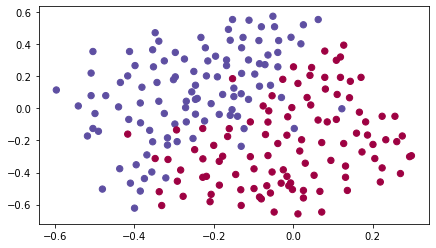

In [24]:
train_X , train_Y , test_X , test_Y = load_2D_dataset()

每一个点都对一个球场上的一个位置，可理解为一个击球点。 
- 如果该点为蓝色，则代表我方选择击球成功
- 如果为红色，则代表对方击球成功

我们要做的就是使用模型来画出一条线，来找到适合我方球员能抢到球的位置。  

我们先不使用正则化，然后再尝试进行优化，并选出较好的模型交差

In [25]:
train_X.shape , train_Y.shape

((2, 211), (1, 211))

## 1 - Non-regularized model



我们将使用如下的模型：  
- 在*regularization mode*下，我们设置`lambd` 不为0->使用正则化。 或设置为0->不使用正则化
- 在*dropout mode* 下， 我们设置`keep_prob` 小于1->使用dropout   。 设置其等于1->不使用dropout

你将首先尝试无正则化的模型，然后你要实现:  
- *L2 regularization* -- 函数: "`compute_cost_with_regularization()`" 和 "`backward_propagation_with_regularization()`"
- *Dropout* -- 函数: "`forward_propagation_with_dropout()`" 和 "`backward_propagation_with_dropout()`"


每次调用我们都将使用下面的模型。  
下面看一下模型

In [26]:
def model( X , Y , learning_rate = 0.3 , num_iterations = 30000 , print_cost = True , lambd = 0 , keep_prob = 1 ): 
    """
    目标： 实现一个三层的神经网络模型 ： LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    
    参数： 
    X -- 输入数据 ， 维度为 (2,数据量)
    Y -- 正确的标签向量  这里是0/1 维度为: (1,数据量) -> 0代表红色的点，1代表蓝色的点
    learning_rate -- 梯度下降的学习率
    num_iterations -- 迭代次数
    print_cost -- 是否输出代价(每1000次迭代)
    lambd -- 正则化超参
    keep_prod -- 随机删除节点时(使用dropout) 节点 保留的概率 ， 默认为1
    
    返回值： 
    parameters -- 训练得到的参数
    """
    
    grads = {} 
    costs = []
    m = X.shape[1]
    lay_dims = [X.shape[0] , 20 , 3 , 1]
    
    #  初始化参数
    parameters = initialize_parameters(lay_dims)
    
    # 迭代
    for i in range(0 , num_iterations):
        
        # 前向传播
        if keep_prob == 1:  # 不随机删除节点
            a3 , cache = forward_propagation(X , parameters)
        elif keep_prob < 1 : # 随机删除节点
            a3 , cache = forward_propagation_with_dropout(X , parameters , keep_prob)
            
        if lambd == 0 : # 不使用正则化
            cost = compute_cost(a3 , Y)
        else: #  使用正则化
            cost = compute_cost_with_regularization(a3 , Y , parameters , lambd )
            
        
        # 反向传播  本次实验对于正则化和随机删除节点 不会同时使用
        if lambd == 0 and keep_prob == 1 : # 不正则化 ，不随机删除节点
            grads = backward_propagation(X , Y , cache)
        elif lambd !=0 : # 正则化 不随机删除节点
            grads = backward_propagation_with_regularization(X , Y , cache , lambd)
        elif keep_prob < 1 : #  # 随机删除节点  不正则化
            grads = backward_propagation_with_dropout(X , Y , cache , keep_prob)
        
        # 更新参数    
        parameters = update_parameters(parameters , grads , learning_rate )
        
        # 打印代价
        if print_cost and i % 10000 == 0 : 
            print("Cost after iteration {}: {} ".format(i , cost))
        if print_cost and i % 1000 == 0: 
            costs.append(cost)         
            
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel('iterations (x1 ,1000)')
    plt.title( "Learning rate = " + str(learning_rate) )
    plt.show()
        
    return parameters

使用模型进行训练(不正则化且不随机删除)

Cost after iteration 0: 0.6557412523481002 
Cost after iteration 10000: 0.16329987525724218 
Cost after iteration 20000: 0.13851642423264765 


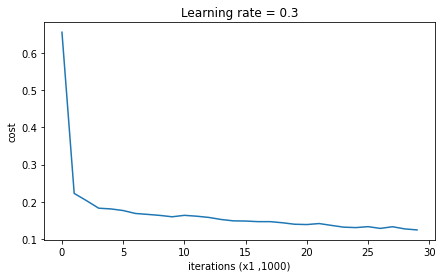

 On the training set :
Accuracy: 0.9478672985781991
 On the test set :
Accuracy: 0.915


In [27]:
parameters = model(train_X , train_Y)
print(" On the training set :")
prediction_train = predict(train_X , train_Y , parameters)
print(" On the test set :")
prediction_test = predict(test_X , test_Y , parameters)


可以看到： 训练集准确率：94.8% 测试集准确率： 91.5%  
后面我们会看到加入正则化会有怎样的影响  
下面绘制边界

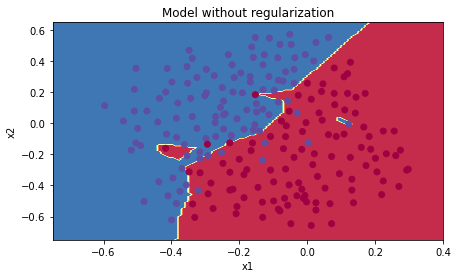

In [28]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim( [-0.75 , 0.40] )
axes.set_ylim( [-0.75 , 0.65] )
plot_decision_boundary(lambda x : predict_dec(parameters, x.T) , train_X ,train_Y)

非正则化出现了过拟合化现象，下面我们尝试进行优化

## 2 - L2 Regularization

避免过拟合化的标准方法是**L2 regularization**  这要求我们修改成本函数从： 
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
到:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

下面，我们修改函数，看会有怎样的效果

**练习**: 实现 `compute_cost_with_regularization()` 使用公式2来计算代价.   
计算 $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , 使用下面的函数:
```python
np.sum(np.square(Wl))
```

注意： 我们要对$W^{[1]}$, $W^{[2]}$ and $W^{[3]}$都执行此操作，并求和，最后乘以$ \frac{1}{m} \frac{\lambda}{2} $.

下面，开始编写相关函数

In [29]:
def compute_cost_with_regularization(A3,Y,parameters,lambd):
    """
    实现加入L2正则化的代价计算
    
    参数：
        A3 -- 正向传播的结果，维度为（输出节点数量，数据量）
        Y -- 包含正确答案的标签向量，与数据一一对应，维度为(输出节点数量，数据量)
        parameters -- 字典 包含模型学习后的参数
    返回
        cost -- 使用公式2计算所得的的包含正则化的代价
    
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost =compute_cost(A3,Y)
    
    # 正则化部分
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2))  + np.sum(np.square(W3))) / (2 * m)
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost


补充一点   我们有找到 包含测试示例的文件，所以就使用了在网上找到的一些生成示例的函数，尽量不全测试实例

In [30]:
def compute_cost_with_regularization_test_case():
    np.random.seed(2)
    X = np.random.randn(4,3)
    Y = np.array([1, 1,0])
    Y = np.matrix(Y)
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1)
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1":W1, "b1": b1,"W2": W2, "b2": b2,"W3": W3,"b3": b3}

    A , cache  = forward_propagation(X , parameters)
    
    return A , Y , parameters


In [31]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 2.995814412835053


**正确输出**: 

<table> 
    <tr>
    <td>
    **cost**
    </td>
        <td>
    2.995814412835053
    </td>
    </tr>

</table> 

改变了cost的计算  ， 相应的也要概念呢反向传播->根据新的cost重新计算梯度， 

**练习：** 实施新的反向传播，考虑正则化。计算添加正则化项的梯度（$\frac{d}{dW}（\frac{1}{2}\frac{lambda}{m}W^2）=\frac{\lambda}{m}W$）。

In [46]:
def backward_propagation_with_regularization(X , Y , cache , lambd): 
    """
    实现添加了L2正则化后的反向传播。
    
    参数：
        X - 输入数据，维度为（输入节点数量，数据量）
        Y - 正确的标签，维度为（输出节点数量，数据量）
        cache - forward_propagation（）的cache 用于计算梯度
        lambda - regularization （正则化）超参数
    
    返回：
        gradients - 字典  ， 包含计算所得的梯度
    """

    m = X.shape[1]
    (Z1 , A1 , W1 ,b1 , Z2 , A2 , W2 , b2 , Z3 , A3 , W3 , b3 ) = cache
    
    dZ3 = A3 - Y 
    dW3 = 1. / m * np.dot(dZ3 , A2.T) + ( lambd * W3 ) / m 
    dZ3 = np.matrix(dZ3)
    db3 = 1. / m * np.sum(dZ3 , axis=1) 
    
    dA2 = np.dot(W3.T , dZ3)
    dZ2 = np.multiply(dA2 , np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2 , A1.T) + (lambd * W2) / m
    dZ2 = np.matrix(dZ2)
    db2 = 1. / m * np.sum(dZ2 , axis=1)
    
    dA1 = np.dot(W2.T , dZ2)
    dZ1 = np.multiply( dA1 , np.int64( A1 > 0 ) )
    dW1 = 1. / m * np.dot( dZ1 , X.T ) + (lambd * W1) / m
    dZ1 = np.matrix(dZ1)
    db1 = 1. / m * np.sum(dZ1 , axis=1)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients
    

In [33]:
def backward_propagation_with_regularization_test_case():
    np.random.seed(2)
    X = np.random.randn(4,3)
    Y = np.array([1, 1,0])
    Y = np.matrix(Y)
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1)
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1":W1, "b1": b1,"W2": W2, "b2": b2,"W3": W3,"b3": b3}

    A , cache  = forward_propagation(X , parameters)
    
    return X , Y , cache

In [47]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd=0.7)
print ("dW1 = " + str(grads["dW1"]))
print ("dW2 = " + str(grads["dW2"]))
print ("dW3 = " + str(grads["dW3"]))

dW1 = [[ 0.00969253 -0.26084927  0.12578027 -0.13910393]
 [-0.19117619  1.00902754  0.05079356 -0.4051402 ]
 [-0.31381791  0.39220867  0.19130222 -0.46829822]
 [ 0.14348959 -0.31946403 -0.16762107 -0.23629025]
 [-0.75347349 -0.16214941 -0.24428425  0.962257  ]]
dW2 = [[-1.96983198e-01  2.27767671e-06  1.26548934e-01 -1.12163148e-01
   3.84854566e+00]
 [-4.35887819e-01  7.15116701e-01  6.24438686e-01  2.91231013e-01
  -1.67873176e+00]
 [ 1.11931381e-02 -4.42723848e-01 -2.05408700e-01 -1.02132599e-01
  -1.57605678e-01]]
dW3 = [[ 2.41691769  0.30233725 -0.2745271 ]]


**正确输出**:

<table> 
    <tr>
    <td>
    **dW1**
    </td>
        <td>
    [[ 0.00969253 -0.26084927  0.12578027 -0.13910393]
 [-0.19117619  1.00902754  0.05079356 -0.4051402 ]
 [-0.31381791  0.39220867  0.19130222 -0.46829822]
 [ 0.14348959 -0.31946403 -0.16762107 -0.23629025]
 [-0.75347349 -0.16214941 -0.24428425  0.962257  ]]
    </td>
    </tr>
    <tr>
    <td>
    **dW2**
    </td>
        <td>
    [[-1.96983198e-01  2.27767671e-06  1.26548934e-01 -1.12163148e-01
   3.84854566e+00]
 [-4.35887819e-01  7.15116701e-01  6.24438686e-01  2.91231013e-01
  -1.67873176e+00]
 [ 1.11931381e-02 -4.42723848e-01 -2.05408700e-01 -1.02132599e-01
  -1.57605678e-01]]
    </td>
    </tr>
    <tr>
    <td>
    **dW3**
    </td>
        <td>
     [[ 2.41691769  0.30233725 -0.2745271 ]]
    </td>
    </tr>
</table> 

这里如果 报错  请尝试  删除 db1/2/3 = 1. / m * np.sum(dZ3 , axis=1 , keepdims=True)  中的keepdims=True ，感兴趣的课深入了解一下原因

令 L2 regularization $(\lambda = 0.7)$ 调用修改后的模型，   
我们的模型将会:   
- `compute_cost_with_regularization` 替代 `compute_cost`
- `backward_propagation_with_regularization` 替代 `backward_propagation`

Let's now run the model with L2 regularization $(\lambda = 0.7)$. The `model()` function will call: 
- `compute_cost_with_regularization` instead of `compute_cost`
- `backward_propagation_with_regularization` instead of `backward_propagation`

如果报错 ， 请还原前面的  keepdims=True

Cost after iteration 0: 0.6974484493131264 
Cost after iteration 10000: 0.2684918873282239 
Cost after iteration 20000: 0.2680916337127301 


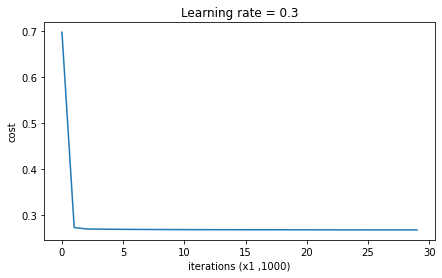

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [48]:
parameters = model(train_X, train_Y, lambd=0.7)
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

现在，测试集的准确率提高到了93%，我们的模型不再过拟合，

绘制边界

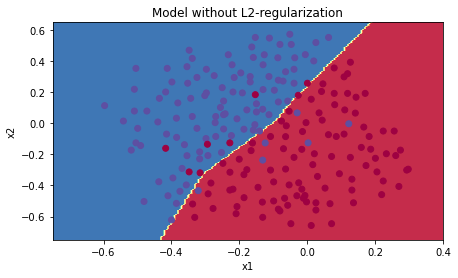

In [49]:
plt.title("Model without L2-regularization")
axes = plt.gca()
axes.set_xlim( [-0.75 , 0.40] )
axes.set_ylim( [-0.75 , 0.65] )
plot_decision_boundary(lambda x : predict_dec(parameters, x.T) , train_X ,train_Y)

对于$\lambda$  我们可以使用开发集进行调整，L2正则化的作用是使得边界更加平滑，如果$\lambda$ 过大则会导致高偏差，  
实际上， L2正则化通过削弱成本函数中权重的平方值，进而是每个权重都变得较小，形成一个更丝滑的边界，

总结：  
L2正则化的影响： 
1. 代价计算       -> 需要将正则化项添加到成本函数中
2. 反向传播     ->因为加入了正则化项，梯度的计算也要相应修改
3. 权重衰减    -> 权重不断变的更小


## 3 - Dropout

最后，我们看**dropout** ， 它是一种广泛使用的正则化技术，作用是，在每次迭代过程中随机关掉一部分神经单元，可以看一下下面的视频
<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center> <u> Figure 2 </u>: Drop-out on the second hidden layer. <br> 在每一次迭代中，关闭（设置为零）一层的部分神经元，关闭的概率为$1 - keep\_prob$，这里保持概率为$keep\_prob$（这里为50％）。被关闭的节点都不参与迭代时的前向和后向传播</center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center> <u> Figure 3 </u>: 在第一个和第三个隐藏层上<br>$1^{st}$layer：我们平均关闭了40%的神经元 $3^{rd}$层：我们平均关闭20%的神经元。
 </center></caption>

当你关掉一些神经元的时候，实际上你已经改变了你的模型。在每次迭代过程中，你都是使用的一个新模型，原模型的一个子集，随着迭代次数的增加，模型的节点会对其他特定节点变得不那么敏感，因为其他节点可能在任何时候会失效。



### 3.1 - Forward propagation with dropout


**练习**: 实现带有dropout的前向传播，在输入和输出层我们不关闭节点。

**介绍**:

1. 在视频中，吴恩达老师讲解了使用 `np.random.rand()`来初始化和$a^{[1]}$具有相同维度的$d^{[1]},在这里，我们将使用向量化实现，我们先来实现一个和 $a^{[1]}$相同的随机矩阵$D^{[1]} = [d^{1} d^{1} … d^{1}] $。

2. 如果$D^{[1]}$低于 `keep_prob`的值我们就把它设置为1，如果高于`keep_prob`的值我们就设置为0。

3. 把$A^{[1]}$  更新为$A^{[1]} * D^{[1]}$. (我们已经关闭了一些节点)。我们可以使用 $D^{[1]}$作为掩码。我们做矩阵相乘的时候，关闭的那些节点（值为0）就会不参与计算，因为0乘以任何值都为0。

4. 使用$A^{[1]}$除以 keep_prob。这样做的话我们通过缩放就在计算成本的时候仍然具有相同的期望值，这叫做反向dropout。

In [50]:
def forward_propagation_with_dropout( X , parameters , keep_prod = 0.5 ):
    
    """
    实现加入dropout的前向传播。
    LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    参数：
        X  -- 数据集，维度为（2，数据量）
        parameters -- 字典 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”
                W1  - 权重矩阵，维度为（20,2）
                b1  - 偏向量，维度为（20,1）
                W2  - 权重矩阵，维度为（3,20）
                b2  - 偏向量，维度为（3,1）
                W3  - 权重矩阵，维度为（1,3）
                b3  - 偏向量，维度为（1,1）
        keep_prob  - 节点保留的概率
    返回：
        A3  --  前向传播的结果，维度为（1,数据量）
        cache --  元组 存储了一些用于计算梯度的数值
    """
    
    np.random.seed(1)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    
    # LINEAR -> RELU -> LINEAR -> RELU ->LINEAR -> SIGMOID 
    Z1 = np.dot(W1 , X) + b1
    A1 = relu(Z1)
    
    # 对应上面的步骤1-4
    D1 = np.random.rand(A1.shape[0] , A1.shape[1])
    D1 = D1 < keep_prod
    A1 = A1 * D1
    A1 = A1 / keep_prod
    
    Z2 = np.dot(W2 , A1) + b2
    A2 = relu(Z2)
    
     # 对应上面的步骤1-4
    D2 = np.random.rand( A2.shape[0] , A2.shape[1] )
    D2 = D2 < keep_prod
    A2 = A2 * D2
    A2 = A2 / keep_prod
    
    Z3 = np.dot(W3 , A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1 , D1 , A1 , W1 , b1 , Z2 , D2 , A2 , W2 , b2 , Z3 , A3 , W3 , b3)
    
    return A3 , cache

### 3.2 - Backward propagation with dropout

**Exercise**:实现带有dropout的反向传播， 将$D^{[1]}$ 和 $D^{[2]}$用到反向传播中

**Instruction**:
分为两个步骤：   
1.我们在之前的正向传播过程中关闭了一些神经元，方法是将掩码$D^{[1]}$应用于`A1`.。在反向传播中，我们必须关闭相同的神经元，方法是将相同的掩码$D^{[1]}$重新应用于`dA1`。

2.在正向传播期间，我们用`A1`.除以`keep_prob`。因此，在反向传播中，我们必须将`dA1`再次除以`keep_prob`（


In [51]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    
    """
    实现我们随机删除的模型的后向传播。
    参数：
        X  -- 数据集，维度为（2，数据量）
        Y  -- 正确的标签，维度为（输出节点数量，数据量）
        cache -- 来自forward_propagation_with_dropout（）返回的cache
        keep_prob  - 节点保留的概率
    
    返回：
        gradients -- 反向传播计算的梯度
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3,A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    
    # 对应步骤1-2
    dA2 = dA2 * D2        
    dA2 = dA2 / keep_prob   
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    # 对应步骤1-2
    dA1 = dA1 * D1         
    dA1 = dA1 / keep_prob  

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


现在我们使用`keep_prob = 0.86`跑一下模型，这意味着，我们每次迭代中 1，2层的节点都有24%的概率被关闭。  
注意， 在模型调用的时候
- `forward_propagation_with_dropout` 替代 `forward_propagation`.
- `backward_propagation_with_dropout` 替代 `backward_propagation`.

Cost after iteration 0: 0.6543912405149825 


/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/reg_utils.py:121: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/chenchangming/Desktop/大二/人工智能学习/git_DL/untitled folder/reg_utils.py:121: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605 
Cost after iteration 20000: 0.060582435798513114 


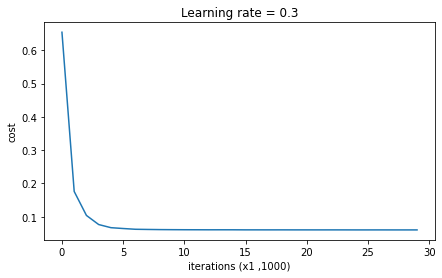

使用dropout，训练集:
Accuracy: 0.9289099526066351
使用dropout，测试集:
Accuracy: 0.95


In [52]:
parameters = model(train_X, train_Y, keep_prob=0.86, learning_rate=0.3)

print("使用dropout，训练集:")
predictions_train = predict(train_X, train_Y, parameters)
print("使用dropout，测试集:")
predictions_test = predict(test_X, test_Y, parameters)


dropout的变现非常好， 测试集准确率提升到了95%  
现在，做出边界

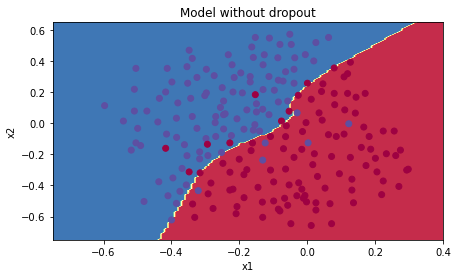

In [53]:
plt.title("Model without dropout")
axes = plt.gca()
axes.set_xlim( [-0.75 , 0.40] )
axes.set_ylim( [-0.75 , 0.65] )
plot_decision_boundary(lambda x : predict_dec(parameters, x.T) , train_X ,train_Y)

**注意:** 我们仅在训练时使用dropout， 在测试时不使用

## 4 - Conclusions

**这是三种不同模型执行结果的总结**: 

<table> 
    <tr>
        <td>
        **model**
        </td>
        <td>
        **train accuracy**
        </td>
        <td>
        **test accuracy**
        </td></tr>
    <tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

记住： 

- 正则化有助于减少过度拟合。

- 正则化将使权重降低。

- L2正则化和dropout是两种非常有效的正则化技术。

# Gradient Checking



最后一个作业，梯度检验。  
假设你现在是一个全球移动支付团队中的一员，现在需要建立一个深度学习模型去判断用户账户在进行付款的时候是否有欺诈行为，比如被黑客入侵。
但是反向传播的实现非常具有挑战性，有时会出现错误。因为这是一个非常关键的应用程序，所以公司的首席执行官希望你能够确保你的反向传播实现是正确的。这就需要进行梯度检验
开始吧-> 

In [54]:
# Packages
import numpy as np
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

## 1) How does gradient checking work?

反向传播计算梯度 $\frac{\partial J}{\partial \theta}$, 其中 $\theta$ 表示模型的参数. $J$ 是使用前向传播和损失函数计算的.

因为前向传播的实现是相对简单的 ， 所以，我们确信我们计算的$J$是正确的，所以我们用计算$J$的代码来编写验证$\frac{\partial J}{\partial \theta}$的代码

回顾一下倒数的定义
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$


同时:

- $\frac{\partial J}{\partial \theta}$ 是你要确保计算正确的值.
- 你可以计算 $J(\theta + \varepsilon)$ 和 $J(\theta - \varepsilon)$ ( $\theta$ 是一个实数), 因为你确信你对$J$的实现是正确的的.

让我们使用方程1和较小的$\varepsilon$ 来证明我们的$\frac{\partial J}{\partial \theta}$计算是准确的

## 2) 1-dimensional gradient checking

先考虑一位线性函数，$J(\theta) = \theta x$. 模型只有一个参数$\theta$,同时$x$作为输入

你要实现对$J(.)$及其派生出的$\frac{\partial J}{\partial \theta}$的计算，然后使用梯度检查确保$J$的导数计算是正确的。 

计算过程:  
<img src="images/1Dgrad_kiank.png" style="width:600px;height:250px;">
<caption><center> <u> **Figure 1** </u>: **1D linear model**<br> </center></caption>


**练习**: 下面，我们为这个简单的函数，实现前向传播和反向传播。

In [55]:
def forward_propagation(x, theta): 
    J = np.dot(theta , x)
    return J

In [56]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


**正确输出**:

<table style=>
    <tr>
        <td>  ** J **  </td>
        <td> 8</td>
    </tr>
</table>

下面实现反向传播

In [57]:
def backward_propagation(x , theta): 
    dtheta = x
    return dtheta

In [58]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


**正确输出**:

<table>
    <tr>
        <td>  ** dtheta **  </td>
        <td> 2 </td>
    </tr>
</table>

**练习**: 为了确保`backward_propagation()`计算出了准确的 $\frac{\partial J}{\partial \theta}$, 我们要实现梯度检验函数

**步骤**:
- 首先使用前面的公式1和较小的$\varepsilon$计算 "gradapprox" 运用下面的步骤:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
 
- 然后使用反向传播计算梯度，并存储结果到变量“grad”  
- 最终 计算相对误差“difference”
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$

You will need 3 Steps to compute this formula
计算此公式需要三个步骤:
   - 1'. 使用np.linalg.norm(...) 计算分子
   - 2'. 使用两次np.linalg.norm(...)  计算分母
   - 3'. 做除法
- 如果误差很小 (小于 $10^{-7}$), 你可以确保你的梯度计算是准确的. 否则，他可能有是出错了。


In [59]:
def gradient_check( x , theta , epsilon = 1e-7 ): 
    """
    
    实现梯度检验。
    
    参数：
        x  -- 实数输入
        theta  - 参数 ， 也是一个实数
        epsilon  - 使用公式（3）计算时的输入即->用微小偏移以计算近似梯度
    
    返回：
        近似梯度和后向传播梯度之间的差异
    """
    thetaplus = theta + epsilon  # step1
    thetaminus = theta - epsilon# step2
    J_plus = forward_propagation(x , thetaplus)# step3
    J_minus = forward_propagation(x , thetaminus)# step4
    gradapprox = ( J_plus - J_minus ) / (2 * epsilon)# step5
    
    grad = backward_propagation(x , theta)
    
    
    numerator = np.linalg.norm( grad - gradapprox ) # step1
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)# step2
    difference = numerator / denominator# step3
    
    if difference < 1e-7 : 
        print("The gradient is correct!")
    else: 
        print("The gradient is wrong!")
    
    return difference

试一试

In [60]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


**正确输出**:
The gradient is correct!
<table>
    <tr>
        <td>  ** difference **  </td>
        <td> 2.9193358103083e-10 </td>
    </tr>
</table>

下面，看一下高维

## 3) N-dimensional gradient checking

下图描述了本题的正向传播和反向传播

<img src="images/NDgrad_kiank.png" style="width:600px;height:400px;">
<caption><center> <u> **Figure 2** </u>: **deep neural network**<br>*LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID*</center></caption>


我们要有前向传播和反向传播

In [61]:
def forward_propagation_n(X , Y , parameters): 
    """
    实现图中的前向传播（计算成本）。
    
    参数：
        X -- 训练集->包含m个例子
        Y -- 正确标签->包含m个示例的正确标签
        parameters -- 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”的python字典：
            W1  -- 权重矩阵，维度为（5,4）
            b1  -- 偏向量，维度为（5,1）
            W2  -- 权重矩阵，维度为（3,5）
            b2  -- 偏向量，维度为（3,1）
            W3  -- 权重矩阵，维度为（1,3）
            b3  -- 偏向量，维度为（1,1）
   
    返回：
        cost -- 代价函数（类型为logistic）
    """
    
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1 , X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3 , A2) + b3
    A3 = sigmoid(Z3)
    
    # 计算代价
    logprobs = np.multiply( -np.log( A3 ) , Y ) + np.multiply( -np.log(1-A3) , 1-Y )
    cost = 1. / m * np.sum(logprobs)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost , cache
    

In [62]:
def backward_propagation_n(X , Y , cache): 
    
    """
    实现图中的反向传播。
    
    参数：
        X -- 输入数据点  维度为（输入节点数量，1）
        Y -- 正确的标签
        cache - 来自forward_propagation_n（）的cache
    
    返回：
        gradients - 字典，包含与每个参数、激活和激活前变量的成本梯度。
    """
    
    m = X.shape[1]
    (Z1 , A1 , W1 ,b1 , Z2 , A2 , W2 , b2 , Z3 , A3 , W3 , b3 ) = cache
    dZ3 = A3 - Y 
    dW3 = 1. / m * np.dot(dZ3 , A2.T) 
    db3 = 1. / m * np.sum(dZ3 , axis=1 )
    
    dA2 = np.dot(W3.T , dZ3)
    dZ2 = np.multiply(dA2 , np.int64(A2 > 0))
    
    dW2 = 1. / m * np.dot(dZ2 , A1.T)  
    
    db2 = 1. / m * np.sum(dZ2 , axis=1 )
    
    dA1 = np.dot(W2.T , dZ2)
    dZ1 = np.multiply( dA1 , np.int64( A1 > 0 ) )
    dW1 = 1. / m * np.dot( dZ1 , X.T ) 
    db1 = 1. / m * np.sum(dZ1 , axis=1 )
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

下面我们准备验证我们的梯度计算是正确的

**How does gradient checking work?**.


和前面一样，公式依然是:  
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

然而，$\theta$不再是一个标量，是一个名叫"parameters"的字典，我们已经实现了一个函数"`dictionary_to_vector()`"。 它将“parameters”字典转换为一个称为“values”的向量，通过将所有参数（W1，b1，W2，b2，W3，b3）转化为向量并将它们连接起来而获得。  
反函数是"`vector_to_dictionary`"，它返回“parameters”字典。



<img src="images/dictionary_to_vector.png" style="width:600px;height:400px;">
<caption><center> <u> **Figure 2** </u>: **dictionary_to_vector() and vector_to_dictionary()**<br> You will need these functions in gradient_check_n()</center></caption>



**练习**: 实现 gradient_check_n().

**提示**: 下面的伪代码将帮助你实现梯度检查

对于每一次 i in num_parameters:
- 计算 `J_plus[i]`:
    1. 设置 $\theta^{+}$ 为 `np.copy(parameters_values)`
    2. 设置 $\theta^{+}_i$ 为 $\theta^{+}_i + \varepsilon$
    3. 使用前向传播`forward_propagation_n(x, y, vector_to_dictionary(`$\theta^{+}$ `))`.计算 $J^{+}_i$       
- 计算 `J_minus[i]`: 用 $\theta^{-}$使用和$J^{+}_i$ 同样的方法计算
- 计算 $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$



下面就是和上面一样计算: 
$$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 } \tag{3}$$

In [63]:
def gradient_check_n(parameters , gradients , X , Y , epsilon = 1e-7): 
    
    """
    检查backward_propagation_n是否可以正确计算forward_propagation_n输出的成本梯度
    
    参数：
        parameters -- 字典 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”：
        gradients - backward_propagation_n的输出 ->  包含与参数相关的成本梯度。
        x  -- 输入数据，维度为（输入节点数量，1）
        y  -- 正确标签
        epsilon  - 计算时的输入即->用微小偏移以计算近似梯度
    
    返回：
        difference -- 近似梯度和后向传播梯度之间的差异 -> 计算误差
    """
    parameters_values , keys = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros( (num_parameters , 1) )
    J_minus = np.zeros( (num_parameters , 1) )
    gradapprox = np.zeros( (num_parameters , 1) )
    
    for i in range(num_parameters): 
        
        #计算J_plus [i]。输入：“parameters_values，epsilon”。输出=“J_plus [i]”
        thetaplus = np.copy(parameters_values)       # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon   # Step 2
        J_plus[i] , _ = forward_propagation_n(X , Y , vector_to_dictionary(thetaplus))  # Step 3
        
        #计算J_minus [i]。输入：“parameters_values，epsilon”。输出=“J_minus [i]”。
        thetaminus = np.copy(parameters_values)   # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon   # Step 2
        J_minus[i] , _ = forward_propagation_n(X , Y , vector_to_dictionary(thetaminus))   # Step 3
        
        #计算gradapprox[i]
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2* epsilon)

        
     #计算误差并比较gradapprox和后向传播梯度。
    numerator = np.linalg.norm( grad - gradapprox )  # Step 1
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)  # Step 2
    difference = numerator / denominator  # Step 3
    
    if difference > 1e-7: 
        print("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")  # 计算错误
    else:  
        print("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")  # 计算正确
    
        
    return difference

试一下

In [64]:
def gradient_check_n_test_case():
    np.random.seed(2)
    X = np.random.randn(4,3)
    Y = np.array([1, 1,0])
    Y = np.matrix(Y)
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1)
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1":W1, "b1": b1,"W2": W2, "b2": b2,"W3": W3,"b3": b3}
 
    
    return X , Y , parameters

In [65]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

Your backward propagation works perfectly fine! difference = 1.3394295503131827e-08


**正确输出**:

<table>
    <tr>
        <td>  ** Your backward propagation works perfectly fine!**  </td>
        <td> difference = 1.3394295503131827e-08 </td>
    </tr>
</table>

注意：   
梯度检验很慢，一般我们不使用它而是使用反向传播

作业就到这里了，很长，内容也很多。加油

参考了网上一些大佬的代码，并加以自己的理解 ， 希望对你有帮助。